In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append("code")
import numpy as np
import matplotlib.pyplot as plt
from keras_tqdm import TQDMNotebookCallback
from npm3dGenerator_tree import NPM3DGenerator, NPM3DGenerator_full
from models import build_point_net, save_model, load_model
import utils_training as u_t

Using TensorFlow backend.


In [2]:
dataset = NPM3DGenerator(paths_to_keep = [0], sample_uniformly_from_classes = True)
print(dataset)

MODIFIYING PATHS ../Benchmark_MVA/training\MiniLille1.ply
LOADING NORMALS ../Benchmark_MVA/training\MiniLille1_normals.npy

NPM3DGenerator config
n_classes         : 6
batch_size        : 8
n_points          : 4096
n_channels        : 8
train             : True
use_normals       : True
normal_radius     : 0.75
compute_normals   : True
class_weight      : [2.48 2.20 343.79 10000.00 16.65 18.26]


647743
0.10970759391784668


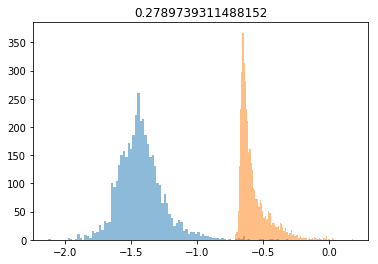

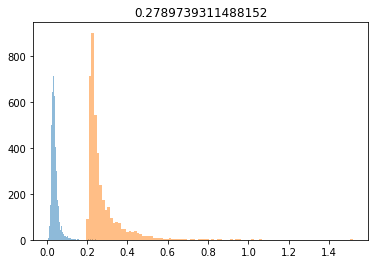

In [3]:
from sklearn.neighbors import KDTree
import time

pc = dataset.sample_point_cloud()
t = time.time()
d, i = KDTree(pc[0][:, :3]).query(pc[0][:, :3], k = 100)
print(time.time() - t)
plt.hist(np.log10(d[:, 1]), bins = 100, alpha = .5)
plt.hist(np.log10(d[:, -1]), bins = 100, alpha = .5)
plt.title(np.mean(d[:, -1]))
plt.show()
plt.hist(d[:, 1], bins = 100, alpha = .5)
plt.hist(d[:, -1], bins = 100, alpha = .5)
plt.title(np.mean(d[:, -1]))
plt.show()

In [2]:
dataset_full = NPM3DGenerator_full(paths_to_keep = [0], use_normals = False)
print(dataset_full)


NPM3DGenerator config
n_classes         : 6
batch_size        : 8
n_points          : 4096
n_channels        : 3
train             : True
class_weight      : [1.79 4.05 20.68 1843.67 23.26 13.72]


In [3]:
def compute_voxel_dico(points, voxel_size):
    
    voxel_indices = (points / voxel_size).astype(int)
    dico = dict()
    for vox in np.unique(voxel_indices, axis = 0):
        dico[tuple(vox)] = []
    for i, vox in enumerate(voxel_indices):
        dico[tuple(vox)] += [i]
        
    return dico

pc = np.array(dataset_full.trees[0].data)
print(pc.shape)
dico = compute_voxel_dico(pc, 0.05)

(30033430, 3)


In [4]:
subsampled_points = np.array([np.mean(pc[vox[1]], axis = 0) for vox in dico.items()])

print(np.max(pc, axis = 0) - np.min(pc, axis = 0))
subsampled_points.shape

KeyboardInterrupt: 

In [10]:
np.array([np.mean(dataset_full.labels[0][vox[1]], axis = 0) for vox in dico.items()])

KeyboardInterrupt: 